
# Linear Regression Project

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

Just follow the steps below to analyze the customer data (it's fake, don't worry I didn't give you real credit card numbers or emails).

## Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline
(You'll import sklearn as you need it.)**

In [59]:
##import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import pearsonr


## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member.

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [60]:
## import the data
df= pd.read_csv('/content/Ecommerce Customers')


**Check the head of customers, and check out its info() and describe() methods.**

In [61]:
## display the top 5 rows
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [62]:
## display the dimesion of the data
df.shape

(500, 8)

In [63]:
## display the statistical matrics for the data and transpose
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,12.052488,0.994216,8.508152,11.388153,11.983231,12.753850,15.126994
Time on Website,500.0,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,3.533462,0.999278,0.269901,2.930450,3.533975,4.126502,6.922689
Yearly Amount Spent,500.0,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


In [64]:
## Check the data for dtypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

<Figure size 1000x600 with 0 Axes>

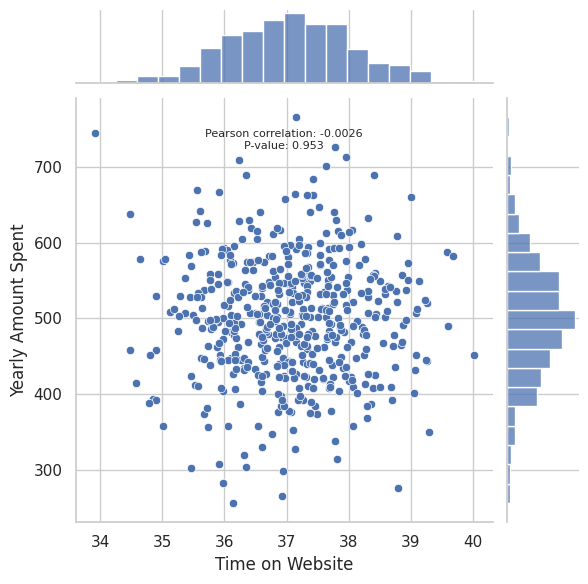

In [65]:
plt.figure(figsize=(10,6))
sns.set(style="whitegrid", color_codes=True)

# Create the jointplot with a sky blue color
joint_plot = sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=df)

# Calculate Pearson correlation coefficient and p-value
pearson_corr, p_value = pearsonr(df['Time on Website'], df['Yearly Amount Spent'])

# Round p-value to 5 decimal places
p_value_rounded = round(p_value, 4)

# Add Pearson correlation coefficient and p-value to the plot
joint_plot.ax_joint.text(0.5, 0.9, f"Pearson correlation: {pearson_corr:.4f}\nP-value: {p_value_rounded}",
                         horizontalalignment='center', verticalalignment='center',
                         transform=joint_plot.ax_joint.transAxes, fontsize=8)

plt.show()


#### Answer: The scatter plot shows the relationship between yearly spending and time spent on a website. However, there isn’t a strong linear correlation between the two variables.  Most of the customers spends time on website between 35 to 39 minutes and there isnt any specific patterns to explain the correlation.

** Do the same but with the Time on App column instead. **

<Figure size 1000x600 with 0 Axes>

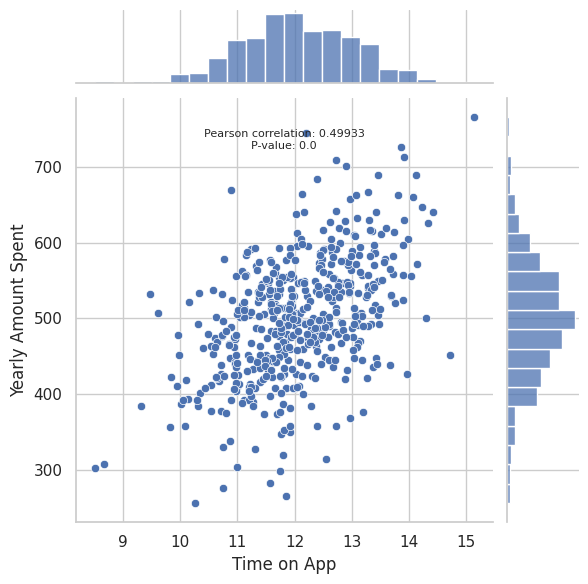

In [66]:
plt.figure(figsize=(10,6))
sns.set(style="whitegrid", color_codes=True)
# Create the jointplot with a sky blue color
joint_plot = sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=df)
# Calculate Pearson correlation coefficient and p-value
pearson_corr, p_value = pearsonr(df['Time on App'], df['Yearly Amount Spent'])
# Round p-value to 5 decimal places
p_value_rounded = round(p_value, 5)
# Add Pearson correlation coefficient and p-value to the plot
joint_plot.ax_joint.text(0.5, 0.9, f"Pearson correlation: {pearson_corr:.5f}\nP-value: {p_value_rounded}",
                         horizontalalignment='center', verticalalignment='center',
                         transform=joint_plot.ax_joint.transAxes, fontsize=8)
plt.show()

#### Answer:  The scatter plot reveals a moderate positive correlation between “Time on App” and “Yearly Amount Spent.” As users spend more time using the app, companies annual spending tends to increase and vice versa for most of the data. This shows that customers prefers to explore about the business on App than on website.

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

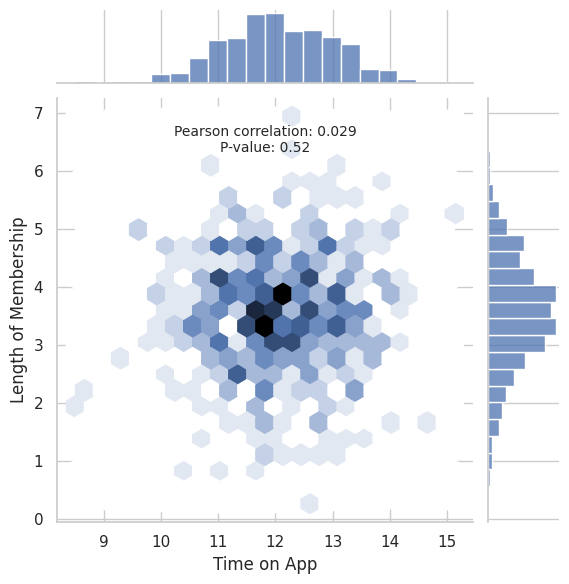

In [67]:
# Create the hexbin joint plot
joint_plot_hex = sns.jointplot(x='Time on App', y='Length of Membership', data=df, kind='hex')

# Calculate Pearson correlation coefficient and p-value
pearson_corr, p_value = pearsonr(df['Time on App'], df['Length of Membership'])

# Round p-value to 5 decimal places
p_value_rounded = round(p_value, 2)

# Add Pearson correlation coefficient and p-value to the plot with smaller font size
joint_plot_hex.ax_joint.text(0.5, 0.9, f"Pearson correlation: {pearson_corr:.3f}\nP-value: {p_value_rounded}",
                             horizontalalignment='center', verticalalignment='center',
                             transform=joint_plot_hex.ax_joint.transAxes, fontsize=10)

plt.show()

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

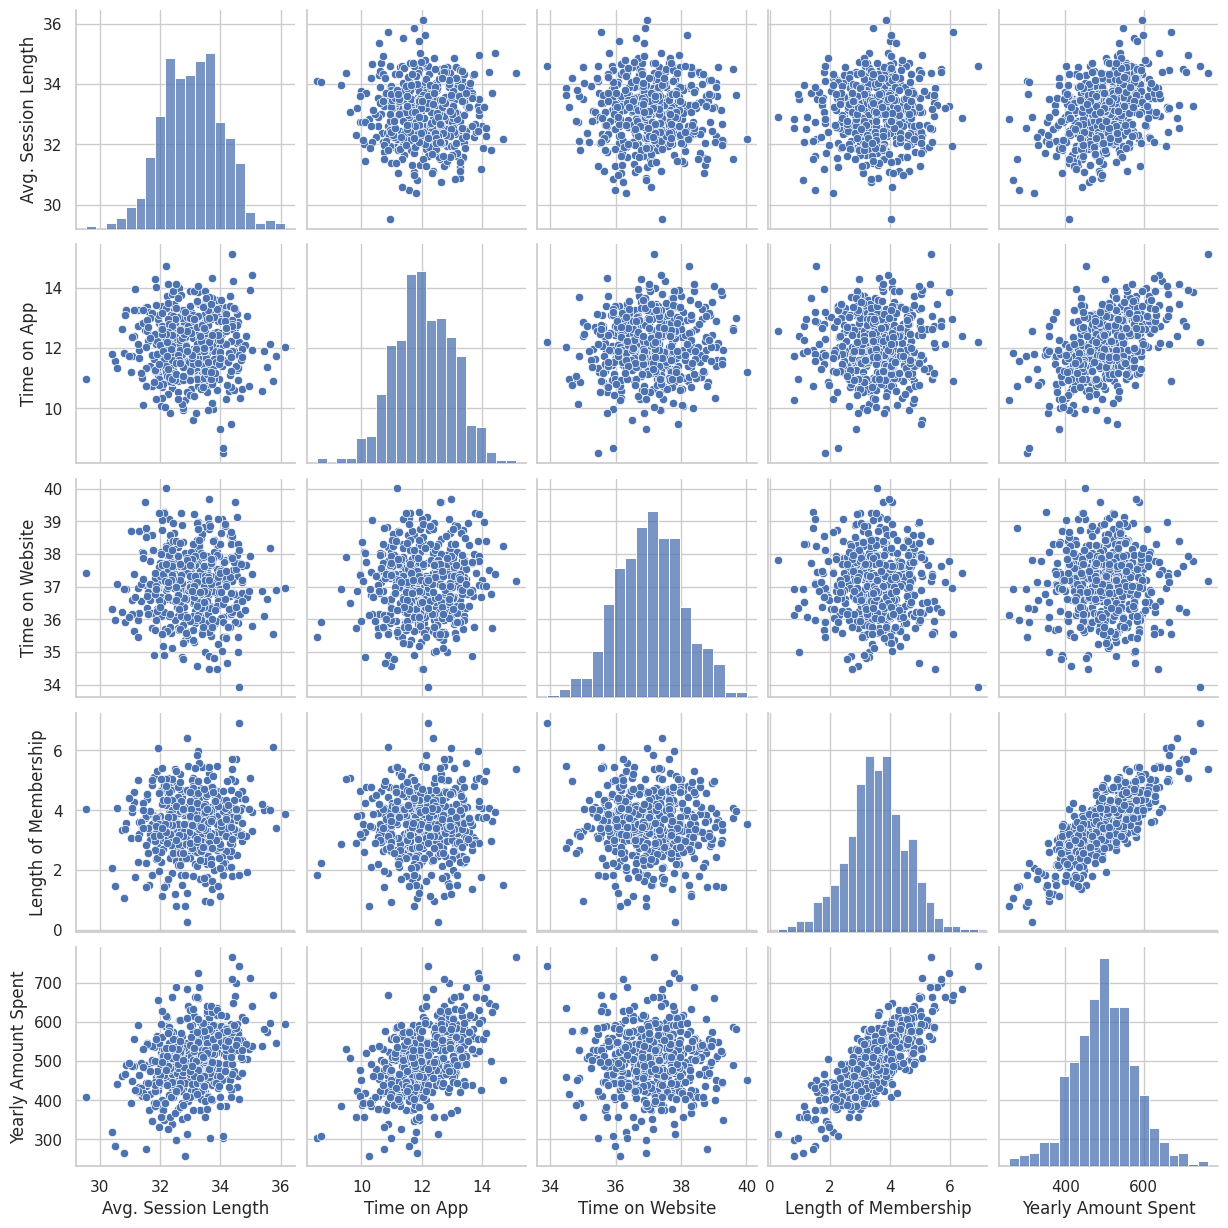

In [68]:
## pair plot for the dataframe
sns.pairplot(df)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

#### Answer; Based on the pairplot  the most correlated feature with Yearly Amount Spent is Length of Membership which has the strong positive correlation with Yearly Amount Spent

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

<Figure size 1000x800 with 0 Axes>

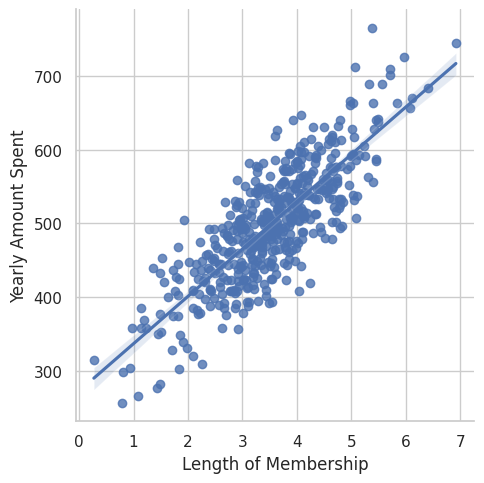

In [69]:
## plot the linear model plot
plt.figure(figsize=(10,8))
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=df)

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [70]:
## define X and y for train and test
X= df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y= df['Yearly Amount Spent']

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [72]:
## import sklearn library
from sklearn.linear_model import LinearRegression


**Create an instance of a LinearRegression() model named lm.**

In [73]:
## initialize the model
lr= LinearRegression()

** Train/fit lm on the training data.**

In [74]:
## fit the model with linear regression
lr.fit(X_train, y_train)

LinearRegression()

**Print out the coefficients of the model**

In [75]:
print(lr.coef_)

[25.98154972 38.59015875  0.19040528 61.27909654]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [76]:
## apply the model to test data for prediction
y_pred= lr.predict(X_test)

In [77]:
## display the y_pred values
y_pred

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

** Create a scatterplot of the real test values versus the predicted values. **

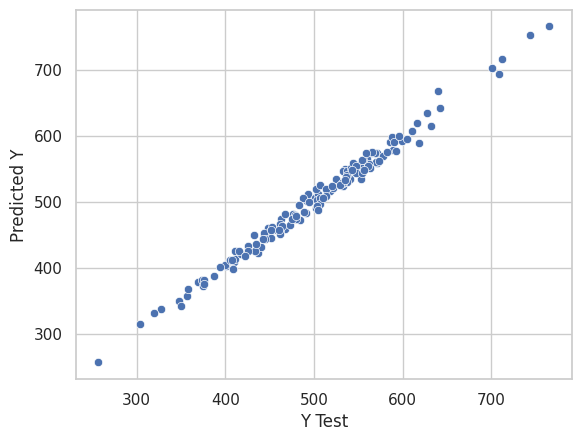

In [78]:
## plot scatter plot
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [79]:
## evaludate the evaludation matrics
from sklearn import metrics
mae= metrics.mean_absolute_error(y_test, y_pred)
mse= metrics.mean_squared_error(y_test, y_pred)
rmse= np.sqrt(mse)
r2= metrics.r2_score(y_test, y_pred)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

Mean Absolute Error: 7.228148653430826
Mean Squared Error: 79.81305165097427
Root Mean Squared Error: 8.933815066978624
R-squared: 0.9890046246741234


## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data.

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

<ipython-input-80-f0d797a1941c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-y_pred), bins=50)


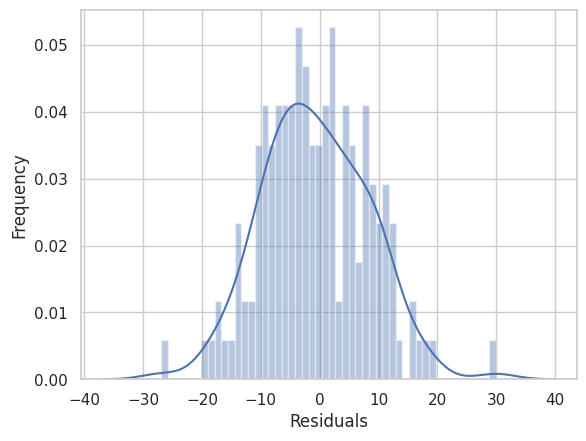

In [80]:
## plot a hist for residuals with bins=50
sns.distplot((y_test-y_pred), bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [81]:
## create a df fro coff
df_coeff = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
df_coeff

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


** How can you interpret these coefficients? **

Answer: In order for the client or the business to aquire new people on the app or website they have to spend 25.98 dollor for one unit of increase session length.
 For one unit increase in time on app they have to spend 38.59 dollor and for website 0.19 dollor.
 Also, lastly the length of membership  costs 61.27 for the same members to stay with the client in by using  app or website.

**Do you think the company should focus more on their mobile app or on their website?**

Answer: It's not easy to say whether the company should spend more on an app or website as we are working with very few data. The limited data restrict us from providing a solid conclusion. To decide whether we should focuss more on app or website we need to see how much time are the customers spending on an app or website for a larger dataset. Also, we need more features to analyse before any conclusion. Also, we need to keep in mind that increase in length of membership costs more for the client and to have a wise decision these data are not enough.